<a href="https://colab.research.google.com/github/bhagyasree790/Codsoft_Internship_Tasks/blob/main/Task3_Codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics

In [66]:
df = pd.read_csv("/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [67]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [68]:
df.shape

(200, 4)

In [69]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [70]:
df['Sales'].value_counts()

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

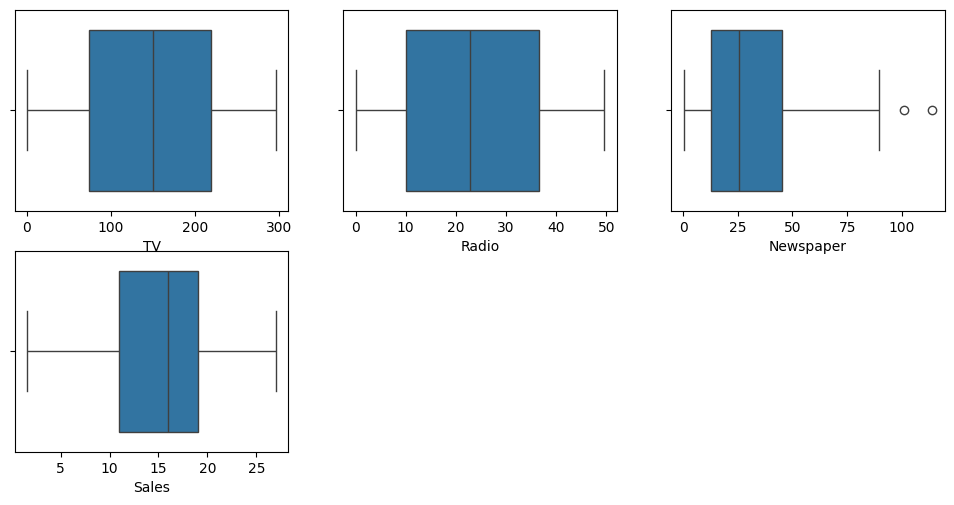

In [71]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['TV','Radio','Newspaper','Sales']):
  plt.subplot(4,3, i+1)
  sns.boxplot(x = col, data = df)
plt.show()

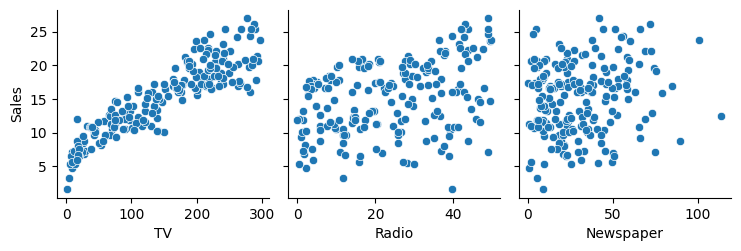

In [72]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind='scatter')
plt.show()

In [73]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


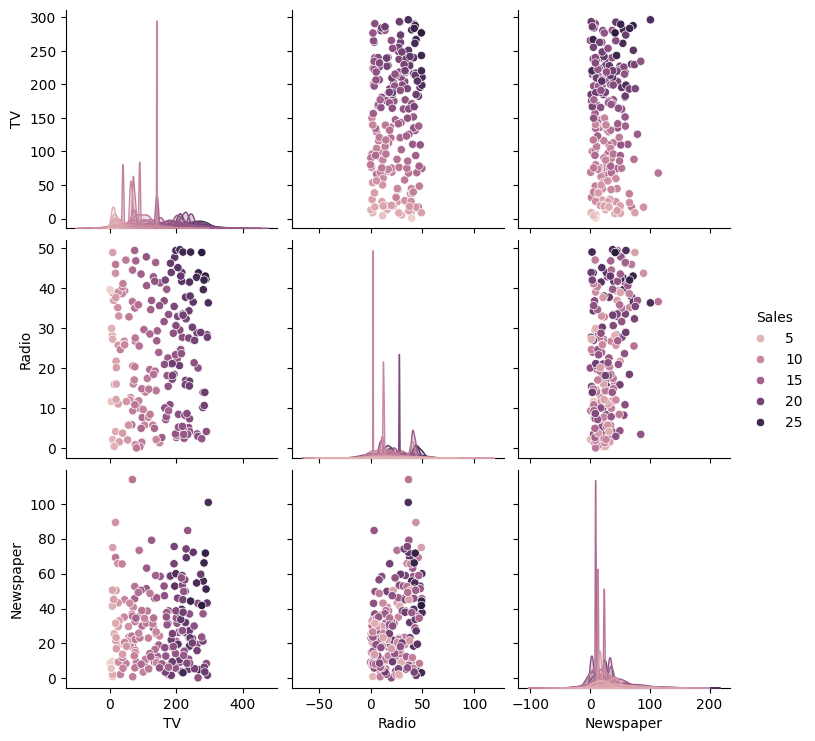

In [74]:
sns.pairplot(df, hue = 'Sales')
plt.show()

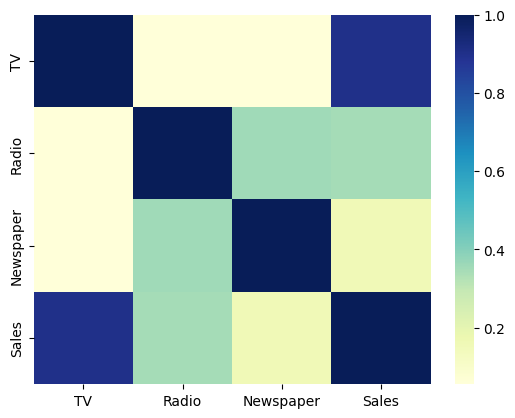

In [75]:
sns.heatmap(df.corr(), cmap = "YlGnBu")
plt.show()

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[['TV']]
Y = df['Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=0)

In [77]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [78]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 7.00
R-squared: 0.77


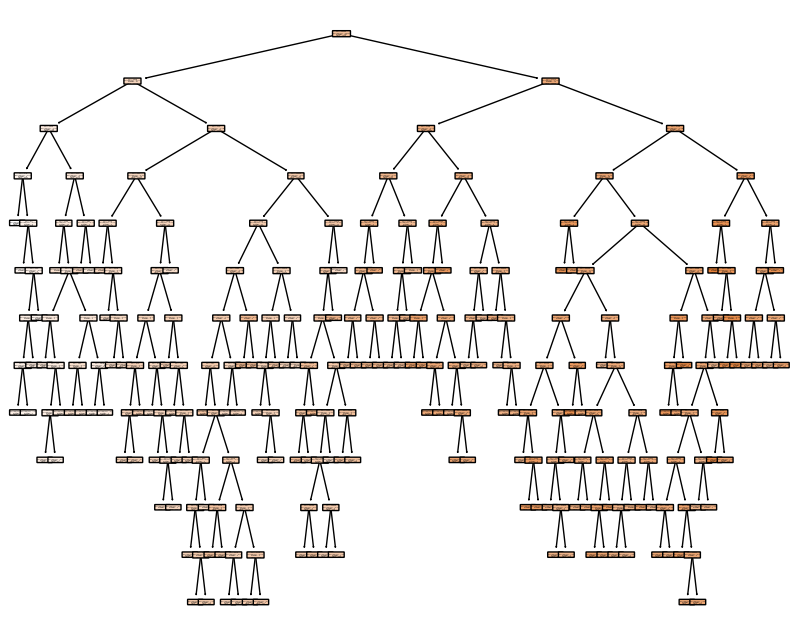

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, Y_train)
Y_pred = knn_regressor.predict(X_test)

In [81]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [82]:
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 7.14


In [83]:
print(f"R-squared: {r2:.2f}")

R-squared: 0.76


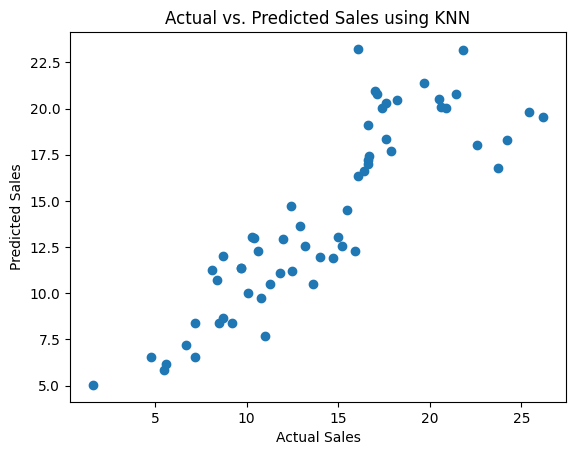

In [84]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales using KNN")
plt.show()

In [85]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, Y_train)
y_pred = linear_reg_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [86]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5.57
R-squared: 0.82


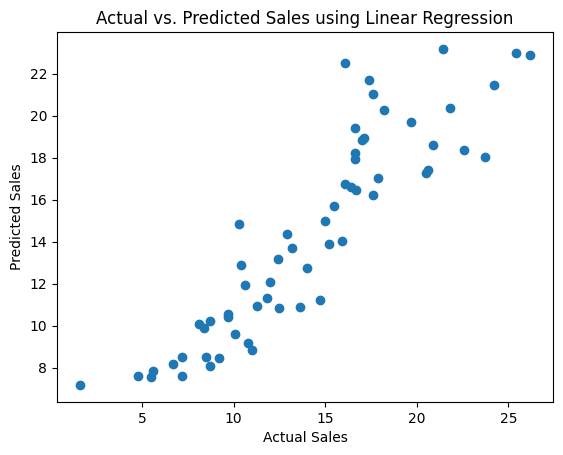

In [87]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales using Linear Regression")
plt.show()

In [88]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, Y_train)

SVR(kernel='linear')

In [89]:
y_pred = svm_regressor.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [90]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5.60
R-squared: 0.81


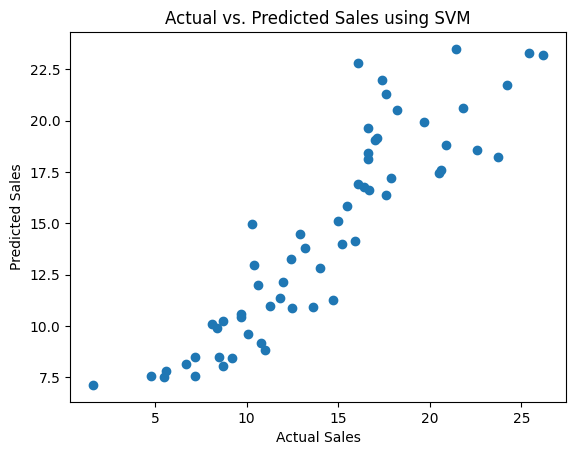

In [91]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales using SVM")
plt.show()